In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import pandas as pd
from datetime import timedelta 
import pickle
import statsmodels.api as sm

In [3]:
def Replace_Outliers(l1):
    l1 = pd.DataFrame({'col': l1})
    Q1 = np.percentile(l1, 25, interpolation='midpoint')
    Q3 = np.percentile(l1, 75, interpolation='midpoint')

    IQR = Q3 - Q1
    df2 = pd.DataFrame(l1)
    outliers = l1[((l1 < (Q1 - 1.5 * IQR)) | (l1 > (Q3 + 1.5 * IQR)))]
    outliers.dropna(inplace=True, axis=0)
    # df=outliers

    outliers = list(outliers.values)
    rep = np.median(l1)
    df2[df2.columns[0]] = df2[df2.columns[0]].replace(outliers, rep)

    #   return list(outliers.flatten())
    return list(df2.values.flatten())


In [4]:
sales_data = pd.read_excel('/content/cona_sample.xlsx')


In [5]:
sales_data

,inv_invoice_date,inv_itemwise_value_reporting_amount
0,2021-04-06,1330.92
1,2021-04-06,3363.60
2,2022-04-04,579.60
3,2022-04-04,1464.48
4,2022-04-04,1464.48
...,...,...
683422,2021-12-31,849.80
683423,2021-12-31,974.60
683424,2022-11-18,10374.00
683425,2022-11-18,-600.03


In [6]:
sales_data['inv_invoice_date'] = pd.to_datetime(sales_data['inv_invoice_date'])
sales_data.set_index('inv_invoice_date', inplace=True)

In [10]:
sales_data_monthly = sales_data.resample('q').sum()

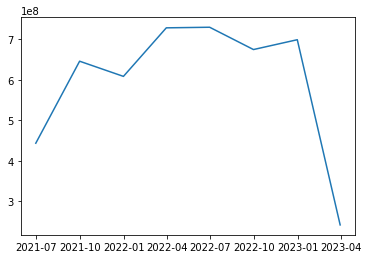

In [11]:
plt.plot(sales_data_monthly)
plt.show()

In [12]:
decomposition = sm.tsa.seasonal_decompose(sales_data_monthly, model='additive')

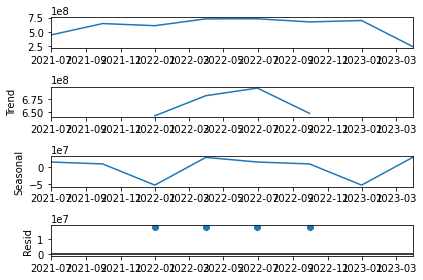

In [13]:
decomposition.plot()
plt.show()

In [17]:
decomposition.observed

inv_invoice_date
2021-06-30    4.436119e+08
2021-09-30    6.461499e+08
2021-12-31    6.086691e+08
2022-03-31    7.285869e+08
2022-06-30    7.300488e+08
2022-09-30    6.749487e+08
2022-12-31    6.992456e+08
2023-03-31    2.417754e+08
Freq: Q-DEC, dtype: float64